# OPCO M 4 - Brief 0 : Boston Housing nettoyage des données.

In [77]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


## Chargement des données et analyse de consistance

In [78]:
df = pd.read_csv('data/BostonHousing.csv')
init_nb_line = df.shape[0]
df.drop_duplicates()
nb_line = df.shape[0]

print(init_nb_line, nb_line)

506 506


In [79]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [80]:
print(df.shape)

(506, 14)


**Matrice de 14 colonnes 506 lignes**



Bilan pas de données manquante ni doublons.

## Distribution

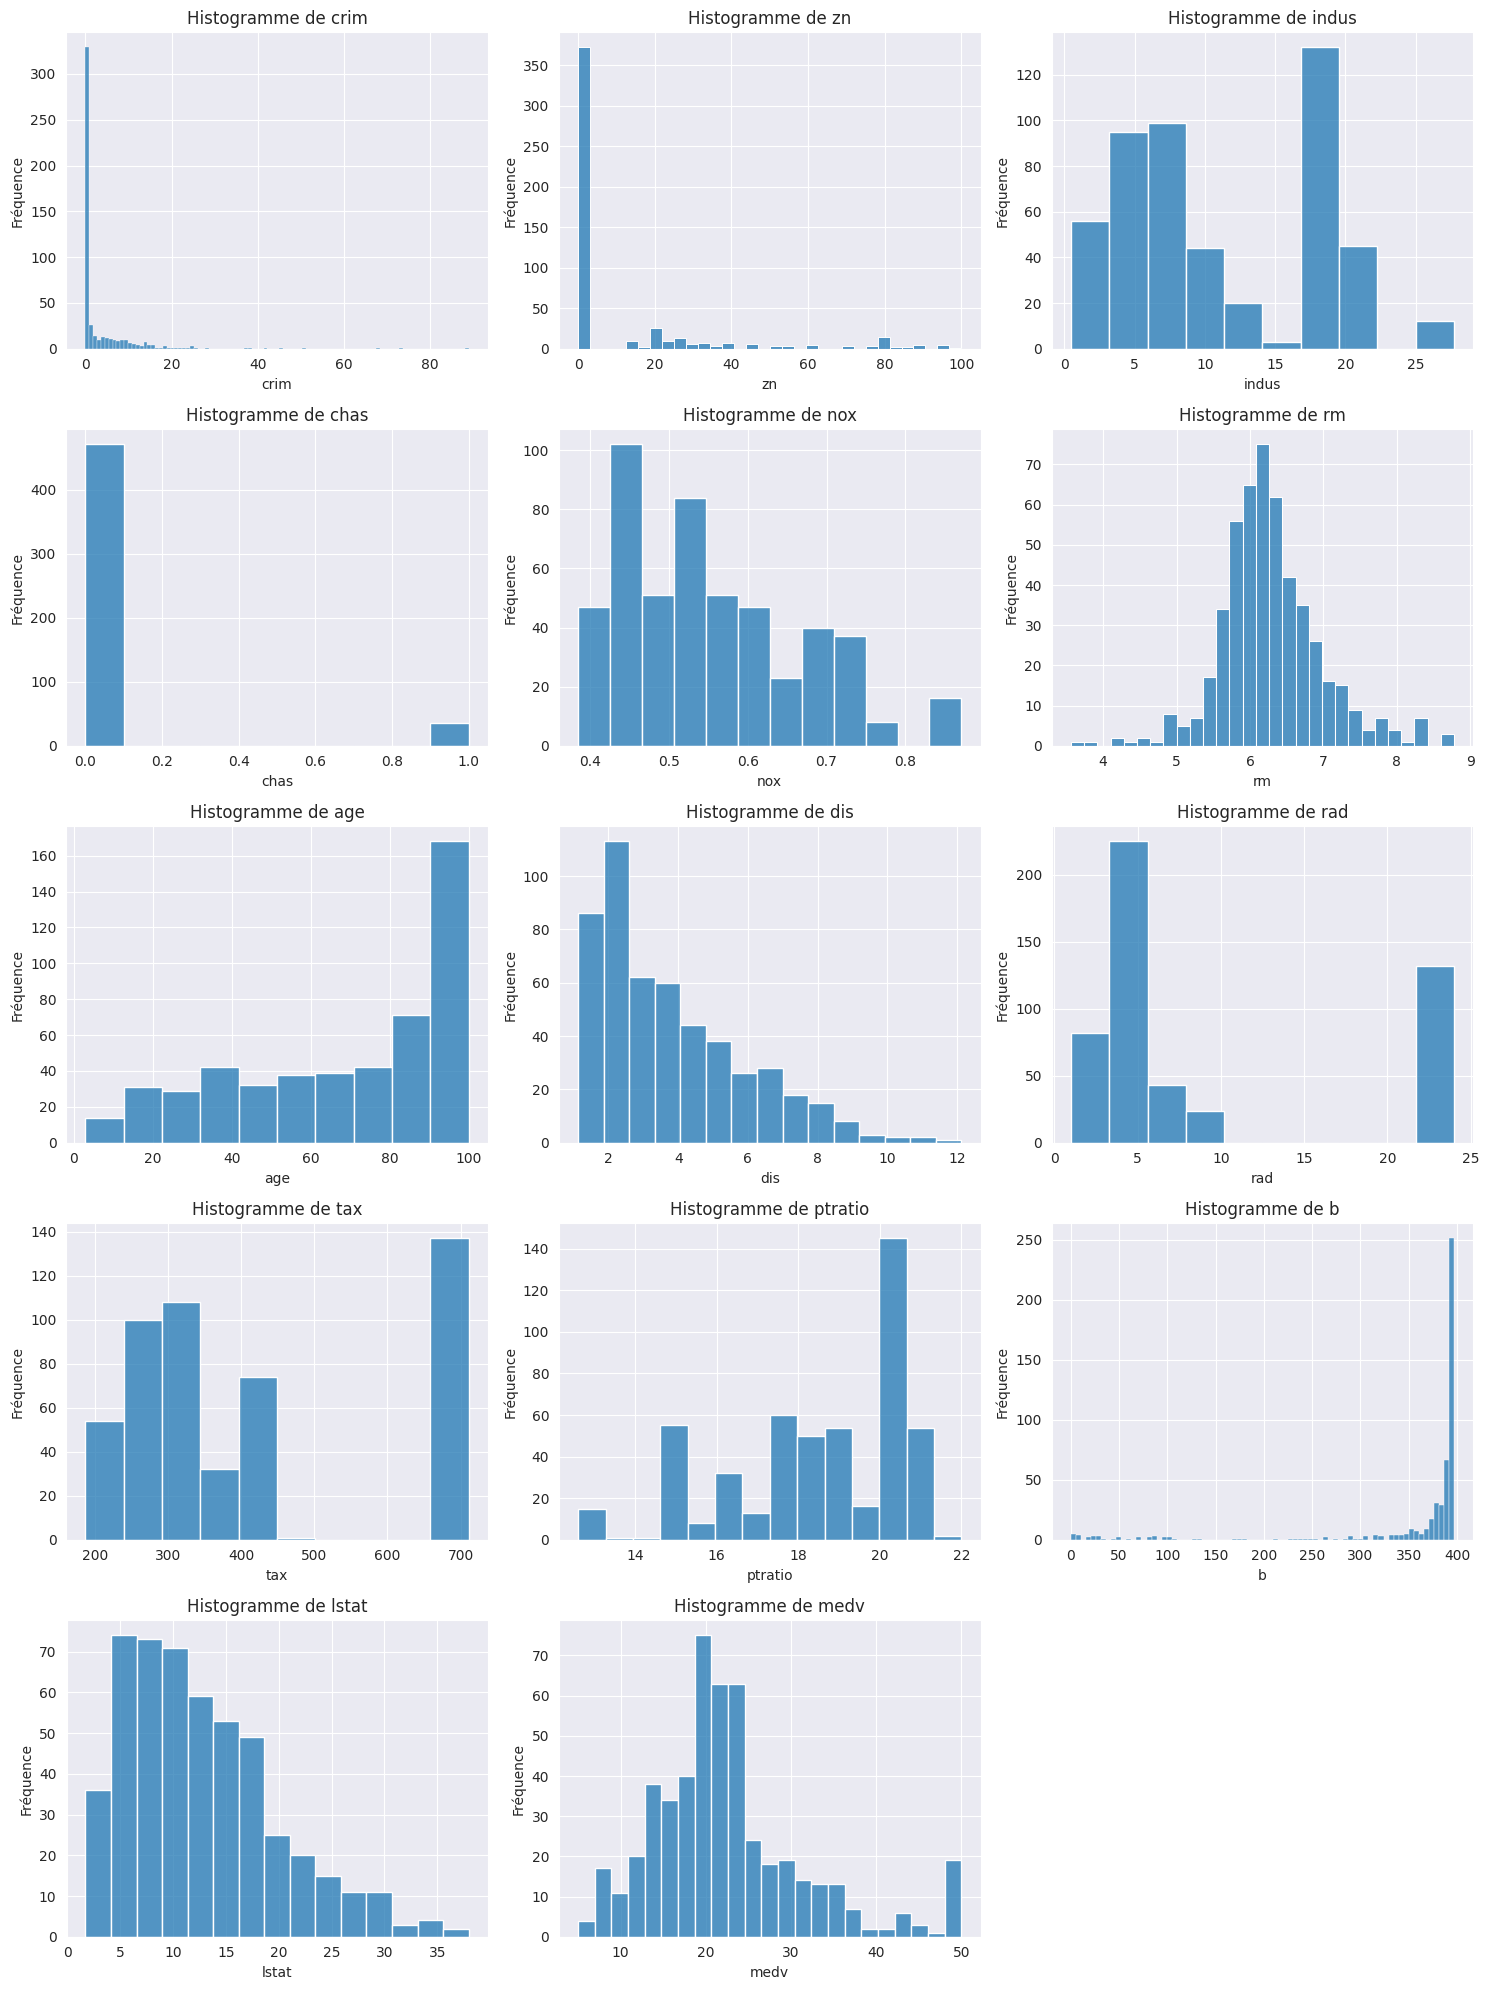

In [81]:
# Determine le nombre de colonne souhaité pour l'affichage du subplot
num_features = df.shape[1] # nombre de features
num_cols = 3 # nombre de colonnes
num_rows = (num_features + num_cols - 1) // num_cols # nombre de lignes

plt.figure(figsize=(num_cols * 5, num_rows * 4)) # On définie la largeur et hauteur des graphe en fonction des valeurs

for i, column in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[column])
    plt.title(f'Histogramme de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')

plt.tight_layout()

Dataset :

target : `medv`

## Observations



### Correlation

In [82]:
df.corr().describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.178963,-0.055854,0.193333,0.081414,0.190798,-0.013762,0.173833,-0.146527,0.235854,0.236150,0.116925,-0.060569,0.141277,-0.068390
std,0.445117,0.487876,0.577203,0.277651,0.573518,0.449620,0.534476,0.552479,0.523372,0.554964,0.425154,0.415799,0.565327,0.528348
min,-0.388305,-0.569537,-0.708027,-0.121515,-0.769230,-0.613808,-0.747881,-0.769230,-0.494588,-0.534432,-0.507787,-0.444413,-0.737663,-0.737663
25%,-0.214552,-0.407666,-0.383001,-0.051121,-0.360585,-0.299653,-0.265217,-0.525073,-0.286423,-0.308934,-0.218699,-0.376560,-0.401268,-0.458232
50%,0.321340,-0.256209,0.394915,0.020710,0.304952,-0.214547,0.307125,-0.306070,0.460382,0.483654,0.225224,-0.225459,0.414833,-0.379290
75%,0.446959,0.277873,0.634534,0.090032,0.653878,0.185952,0.578368,0.238758,0.607363,0.646708,0.380947,0.163657,0.579158,0.312578
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

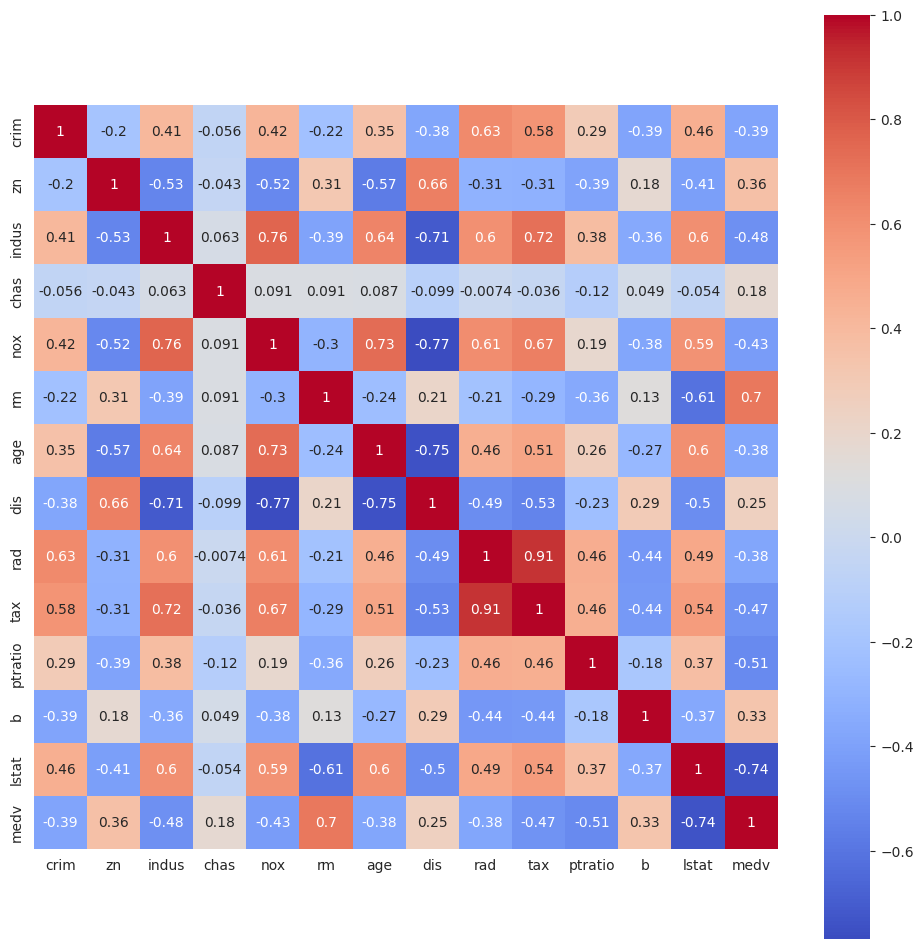

In [83]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), square=True, annot=True, cmap='coolwarm')

<Axes: >

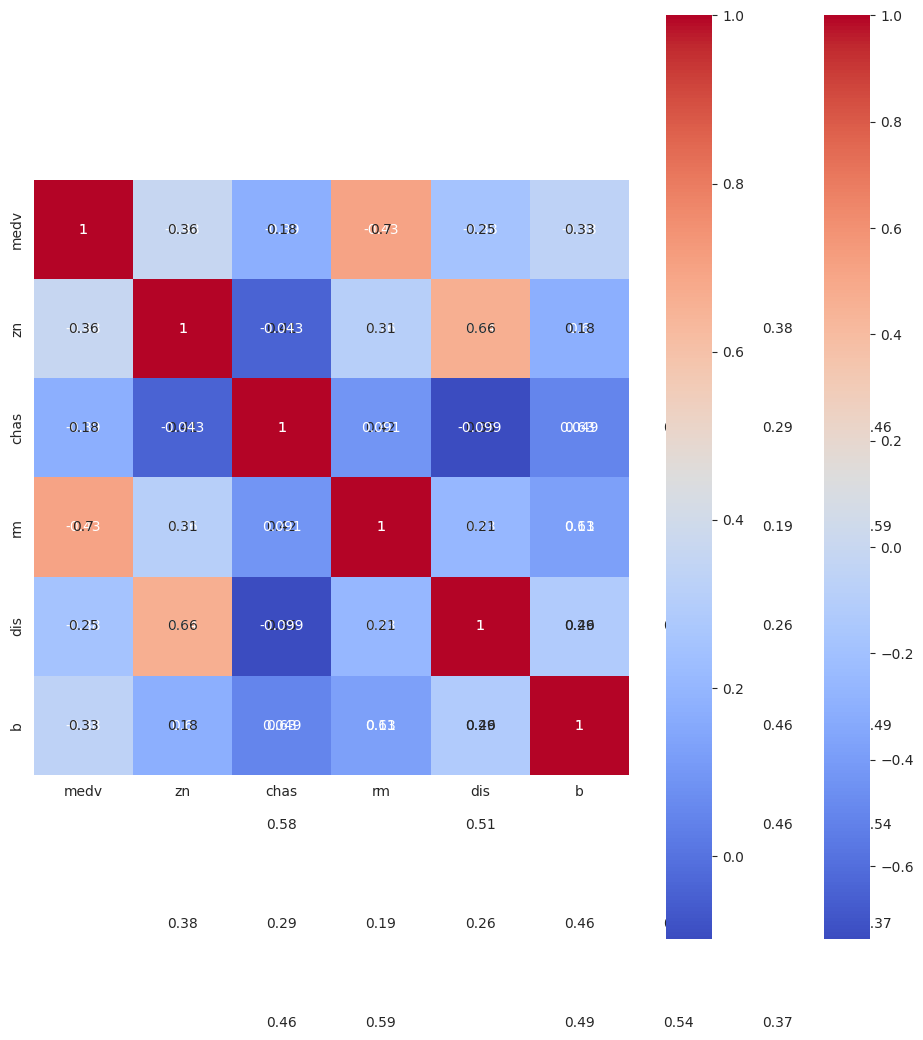

In [84]:
plt.figure(figsize=(12,12))
sns.heatmap(df[['medv', 'indus','crim','nox','age','rad','tax','ptratio', 'lstat']].corr(), square=True, annot=True, cmap='coolwarm')
sns.heatmap(df[['medv', 'zn','chas','rm','dis','b']].corr(), square=True, annot=True, cmap='coolwarm')

<Axes: >

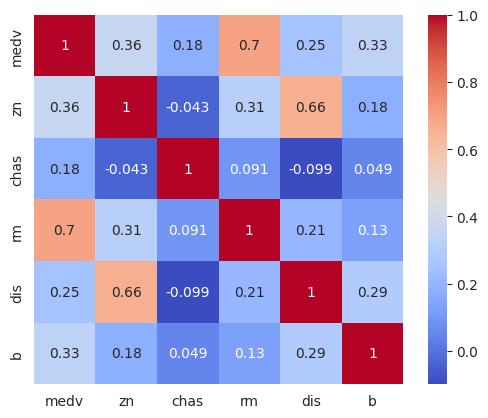

In [85]:
sns.heatmap(df[['medv', 'zn','chas','rm','dis','b']].corr(), square=True, annot=True, cmap='coolwarm')

<Axes: xlabel='medv', ylabel='b'>

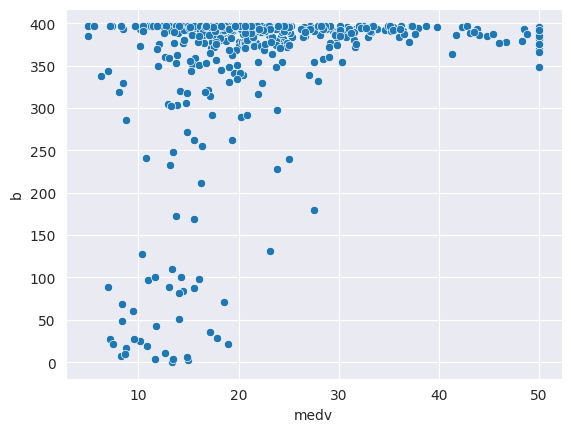

In [86]:
sns.scatterplot(data=df[['medv', 'b']], x='medv', y='b')

# Nettoyage éthique

On supprime les données sur l'éthnie des population


In [87]:
df.drop(columns=['b'], inplace=True)

# Nettoyage technique

On pourrait chercher à éliminé des features ayant des correlation fortes entre elles et la target pour réduire les features en éliminant les correlation redondantes :

Par exemple :
* FeatA correlé a FeatB correlé a Target
* FeatA correlé a Target (on décide de supprimer FeatB)

Dans ce cas on regarde la correlation entre qualité de l'air, zone industriel et prix

<Axes: >

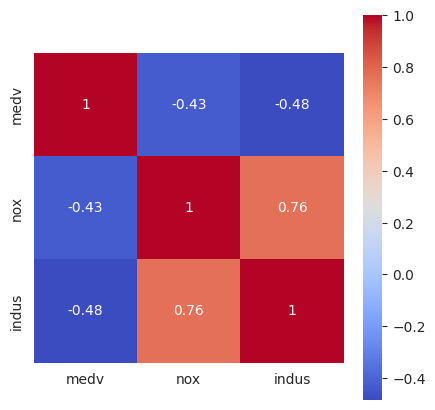

In [88]:
plt.figure(figsize=(5,5))
sns.heatmap(df[['medv', 'nox', 'indus']].corr(), square=True, annot=True, cmap='coolwarm')

On voit que il y'a forte corrélation entre indus et nox.

On garde indus et on supprime nox car la correlation est forte entre les 2, on conserve indus car cette valeur influe sur mdev de manière plus importante.

Il y'a peut-être d'autres correlation liées existantes, mais dans le cadre de l'exercice on s'arrète ici.


In [89]:
df.drop(columns=['nox'], inplace=True)

# Sauvegarde du dataset nettoyé

**REMARQUE : Dans la suite les tests seront effectués sur le dataset brute afin de pouvoir évaluer le gain ou la perte suite a la modification du datset initial.**

In [90]:
# Sauvegarde
df.to_csv('data/BostonHousingClean.csv', index=False)

 # Ressource

Conseil nettoyage de données : https://www.marketcalls.in/machine-learning/decoding-features-and-targets-in-machine-learning-the-keys-to-model-success.html